## Loading of datasets and importing modules

In [1]:
import pandas as pd

# Define file paths (update the paths if they differ in your project)
books_file = 'P505/Books.csv'
ratings_file = 'P505/Ratings.csv'
users_file = 'P505/Users.csv'

In [2]:
# Load datasets with specified dtype for column 3 in books_file
print("Loading datasets...")
books_df = pd.read_csv(books_file, encoding='latin-1', dtype={3: str})
ratings_df = pd.read_csv(ratings_file, encoding='latin-1')
users_df = pd.read_csv(users_file, encoding='latin-1')

Loading datasets...


In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Data Cleaning for Users Dataset

In [8]:
print("\nCleaning Users dataset...")

# Convert 'User-ID' to string for consistency
if 'User-ID' in users_df.columns:
    users_df['User-ID'] = users_df['User-ID'].astype(str)


Cleaning Users dataset...


In [9]:
# Impute missing Age:
if 'Age' in users_df.columns:
    # Calculate median age ignoring missing values
    median_age = users_df['Age'].median()
    print(f"Imputing missing Age values with median: {median_age}")
    users_df['Age'] = users_df['Age'].fillna(median_age)


Imputing missing Age values with median: 32.0


In [10]:
# Impute missing Location:
if 'Location' in users_df.columns:
    print("Imputing missing Location values with 'Unknown'.")
    users_df['Location'] = users_df['Location'].fillna('Unknown')


Imputing missing Location values with 'Unknown'.


## Data Cleaning for Books Dataset


In [11]:
print("\nCleaning Books dataset...")

# Convert 'ISBN' to string for consistency
if 'ISBN' in books_df.columns:
    books_df['ISBN'] = books_df['ISBN'].astype(str)



Cleaning Books dataset...


In [12]:
# Impute missing Book-Title with a default value
if 'Book-Title' in books_df.columns:
    print("Imputing missing Book-Title values with 'Unknown Title'.")
    books_df['Book-Title'] = books_df['Book-Title'].fillna('Unknown Title')


Imputing missing Book-Title values with 'Unknown Title'.


In [13]:
# Impute missing Book-Author with a default value
if 'Book-Author' in books_df.columns:
    print("Imputing missing Book-Author values with 'Unknown Author'.")
    books_df['Book-Author'] = books_df['Book-Author'].fillna('Unknown Author')


Imputing missing Book-Author values with 'Unknown Author'.


In [14]:
# Impute missing Year-Of-Publication with the median (if numerical) or 'Unknown Year'
if 'Year-Of-Publication' in books_df.columns:
    # Try converting the year to numeric; if not possible use a default label
    books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
    median_year = int(books_df['Year-Of-Publication'].median())
    print(f"Imputing missing Year-Of-Publication values with median: {median_year}")
    books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].fillna(median_year).astype(int)


Imputing missing Year-Of-Publication values with median: 1995


In [15]:
# Impute missing Publisher with a default value
if 'Publisher' in books_df.columns:
    print("Imputing missing Publisher values with 'Unknown Publisher'.")
    books_df['Publisher'] = books_df['Publisher'].fillna('Unknown Publisher')


Imputing missing Publisher values with 'Unknown Publisher'.


In [16]:
# Impute missing image URLs with a placeholder text if necessary
for col in ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']:
    if col in books_df.columns:
        print(f"Imputing missing {col} values with 'No Image Available'.")
        books_df[col] = books_df[col].fillna('No Image Available')


Imputing missing Image-URL-S values with 'No Image Available'.
Imputing missing Image-URL-M values with 'No Image Available'.
Imputing missing Image-URL-L values with 'No Image Available'.


## Data Cleaning for Ratings Dataset

In [17]:
print("\nCleaning Ratings dataset...")

# Convert 'User-ID' and 'ISBN' to string for consistency
if 'User-ID' in ratings_df.columns:
    ratings_df['User-ID'] = ratings_df['User-ID'].astype(str)
if 'ISBN' in ratings_df.columns:
    ratings_df['ISBN'] = ratings_df['ISBN'].astype(str)



Cleaning Ratings dataset...


In [18]:
# For the ratings, if there are any missing values in the rating, impute with 0
# Note: 0 may denote an implicit rating according to the dataset description.
if 'Book-Rating' in ratings_df.columns:
    print("Imputing missing Book-Rating values with 0.")
    ratings_df['Book-Rating'] = ratings_df['Book-Rating'].fillna(0)


Imputing missing Book-Rating values with 0.


## Saving the Cleaned Data

In [19]:
books_clean_file = 'P505/Books_clean.csv'
ratings_clean_file = 'P505/Ratings_clean.csv'
users_clean_file = 'P505/Users_clean.csv'

In [19]:
print("\nSaving cleaned datasets...")
books_df.to_csv(books_clean_file, index=False, encoding='latin-1')
ratings_df.to_csv(ratings_clean_file, index=False, encoding='latin-1')
users_df.to_csv(users_clean_file, index=False, encoding='latin-1')



Saving cleaned datasets...


In [20]:
print("Data cleaning completed. Cleaned files are saved as:")
print(f"- {books_clean_file}")
print(f"- {ratings_clean_file}")
print(f"- {users_clean_file}")

Data cleaning completed. Cleaned files are saved as:
- P505/Books_clean.csv
- P505/Ratings_clean.csv
- P505/Users_clean.csv


In [21]:
# Load the cleaned datasets
print("Loading cleaned datasets...")
books_df = pd.read_csv(books_clean_file, encoding='latin-1')
ratings_df = pd.read_csv(ratings_clean_file, encoding='latin-1')
users_df = pd.read_csv(users_clean_file, encoding='latin-1')


Loading cleaned datasets...


In [22]:
# Step 1: Merge Ratings with Books on 'ISBN'
# --------------------------------------------------
merged_df = pd.merge(ratings_df, books_df, on='ISBN', how='inner')
print("Merged Ratings and Books. Shape:", merged_df.shape)


Merged Ratings and Books. Shape: (1031136, 10)


In [23]:
# Step 2: Merge the result with Users on 'User-ID'
# --------------------------------------------------
merged_df = pd.merge(merged_df, users_df, on='User-ID', how='inner')
print("Merged with Users. Final merged dataset shape:", merged_df.shape)


Merged with Users. Final merged dataset shape: (1031136, 12)


In [24]:
# Save the final merged dataset
merged_file = 'P505/Merged_data_new.csv'
merged_df.to_csv(merged_file, index=False, encoding='latin-1')

print("Data merging completed. Merged dataset saved as:", merged_file)

Data merging completed. Merged dataset saved as: P505/Merged_data_new.csv


In [26]:
# Load the merged dataset
merged_df = pd.read_csv('P505/Merged_data.csv', encoding='latin-1')
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


## Data Exploration and Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

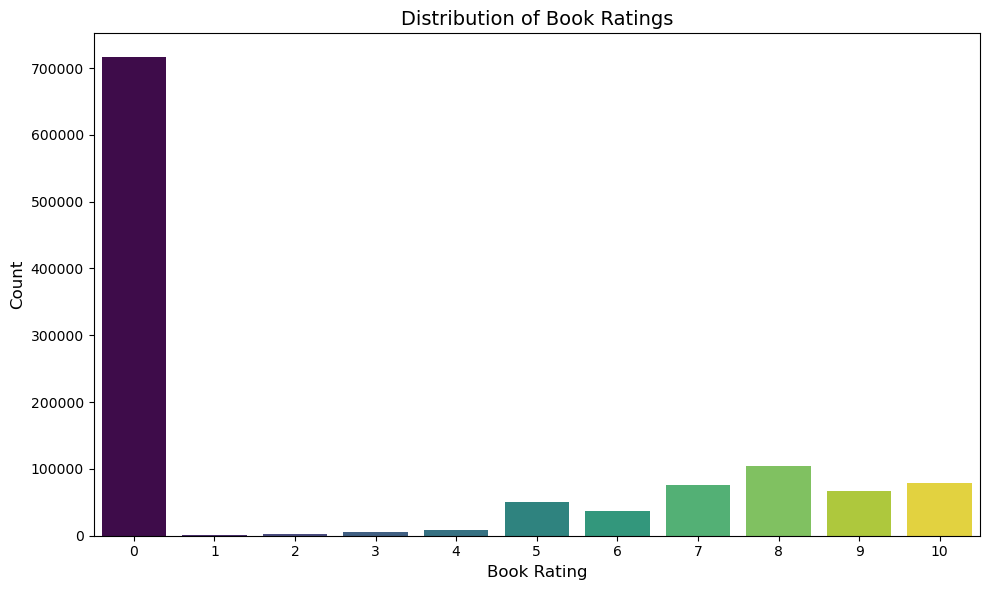

In [28]:
# 1. Distribution of Book Ratings
###########################################
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=ratings_df, hue='Book-Rating', palette='viridis', legend=False)
plt.title('Distribution of Book Ratings', fontsize=14)
plt.xlabel('Book Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

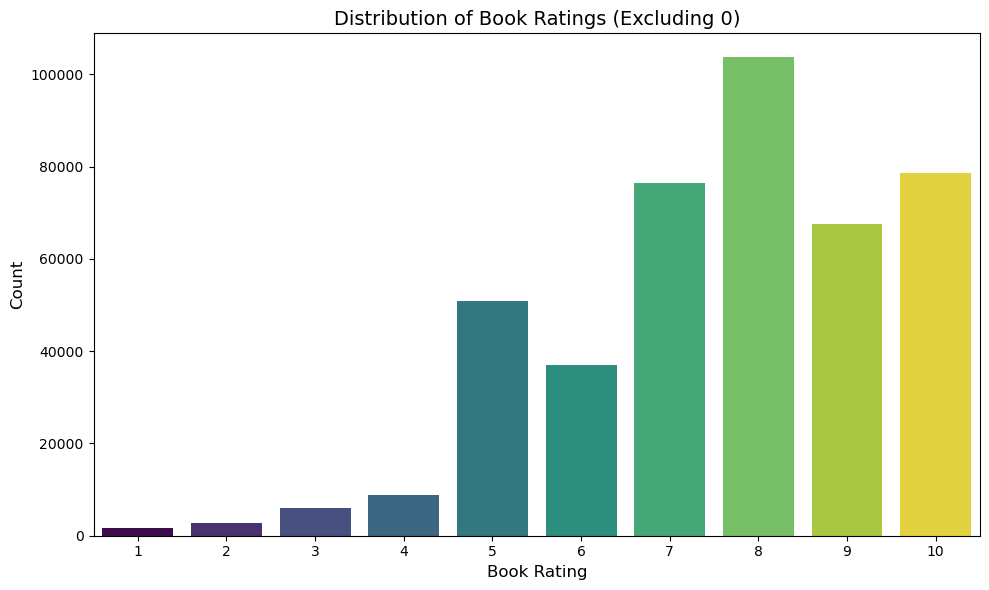

In [39]:
# Filter out ratings that are 0
filtered_ratings_df = ratings_df[ratings_df['Book-Rating'] != 0]

# Plot the distribution of book ratings excluding 0
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=filtered_ratings_df, hue='Book-Rating', palette='viridis', legend=False)
plt.title('Distribution of Book Ratings (Excluding 0)', fontsize=14)
plt.xlabel('Book Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

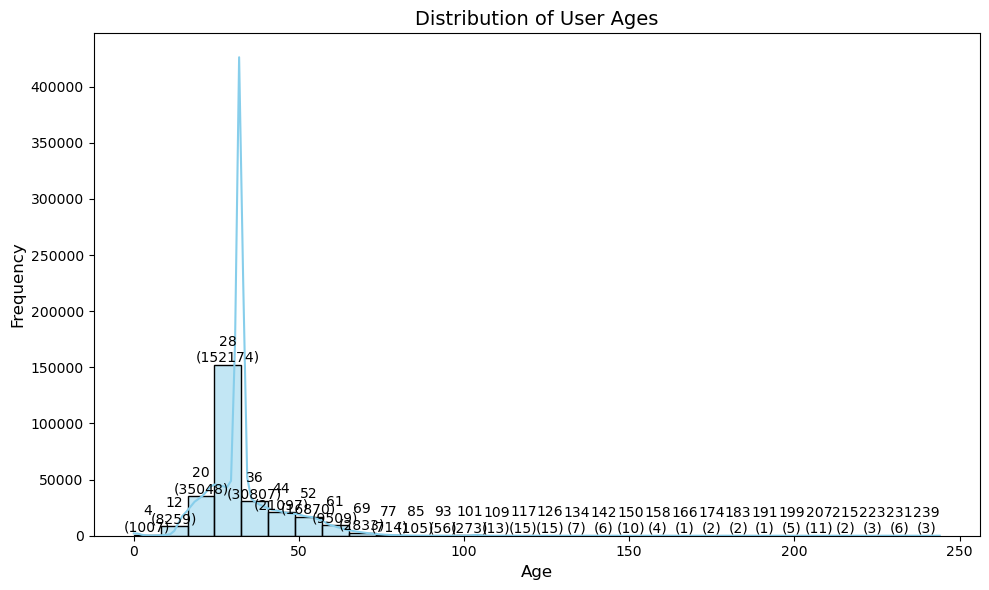

In [41]:
# 2. Distribution of User Ages
# Plot the distribution of user ages
plt.figure(figsize=(10, 6))
# Drop NaNs if any and plot histogram with KDE
ax = sns.histplot(users_df['Age'].dropna(), bins=30, kde=True, color='skyblue')

# Add numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(p.get_x() + p.get_width() / 2.)}\n({int(height)})', ha='center', va='bottom')

plt.title('Distribution of User Ages', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

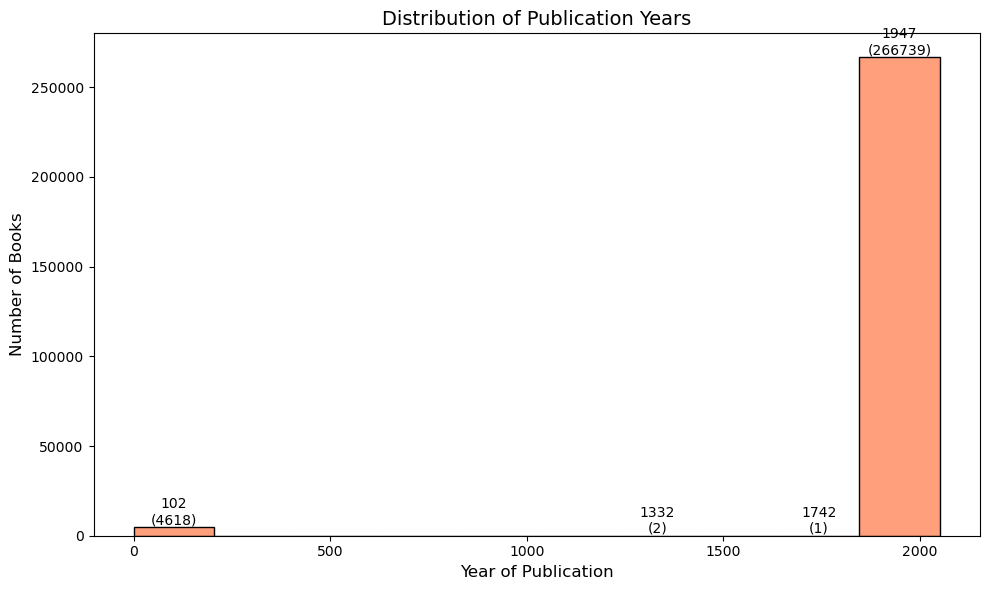

In [47]:
# 3. Distribution of Publication Years for Books
###########################################
# Plot the distribution of publication years for books
plt.figure(figsize=(10, 6))
# Convert 'Year-Of-Publication' to numeric, forcing errors to NaN if any
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
ax = sns.histplot(books_df['Year-Of-Publication'].dropna(), bins=10, kde=False, color='coral')

# Add numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(p.get_x() + p.get_width() / 2.)}\n({int(height)})', ha='center', va='bottom')

plt.title('Distribution of Publication Years', fontsize=14)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/26/00slbxsd34bg6pgc2vpx2k700000gn/T/ipykernel_35602/4029779070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year-Of-Publication', y='Count', data=year_counts, palette='viridis')


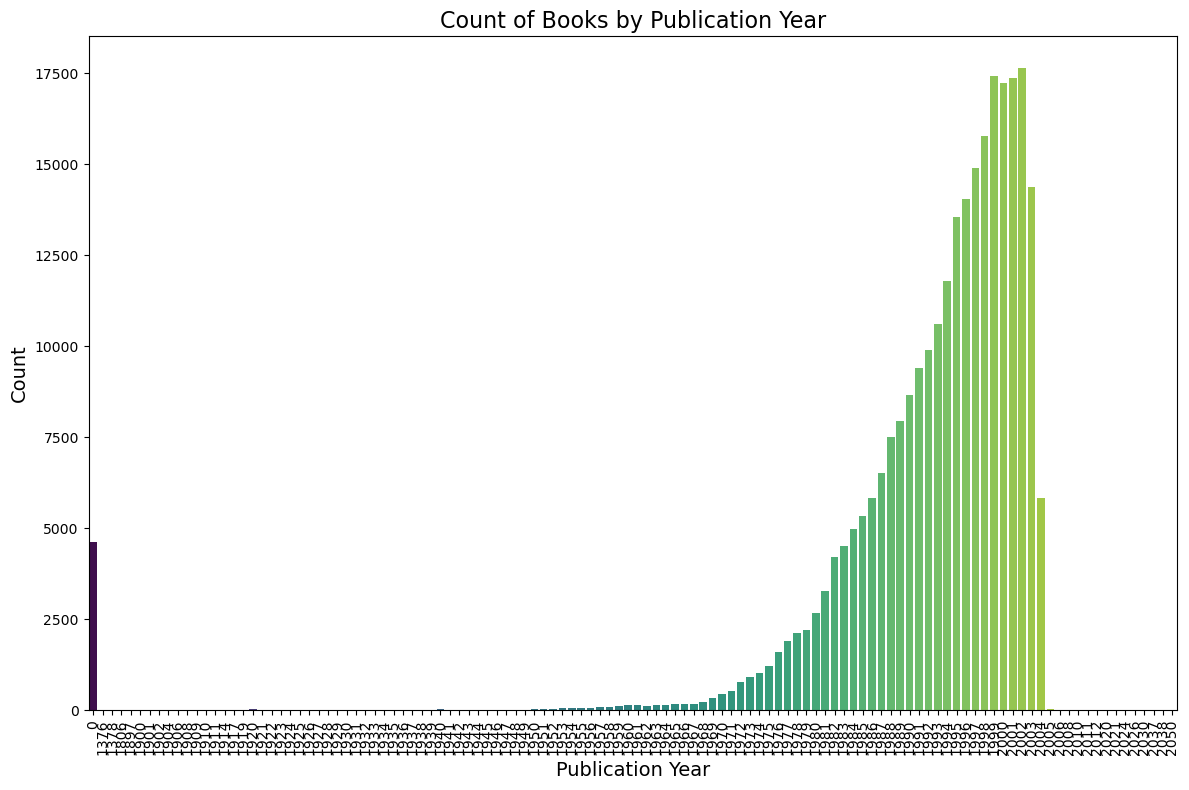

In [50]:
# Ensure 'Year-Of-Publication' is numeric.
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Group by publication year and count occurrences
year_counts = books_df.groupby('Year-Of-Publication').size().reset_index(name='Count')

# Create a bar plot to visualize the number of books published each year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year-Of-Publication', y='Count', data=year_counts, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Books by Publication Year', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

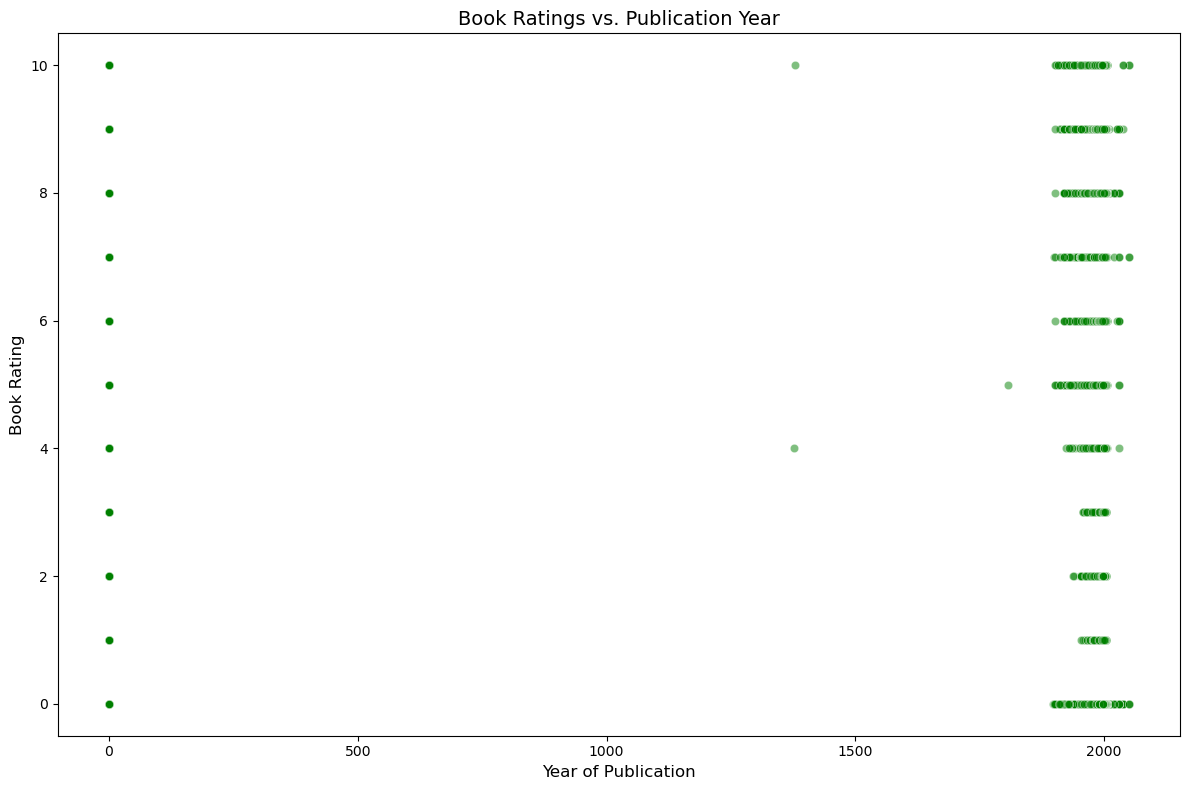

In [27]:
# 4. Relationship Between Book Publication Year and Rating
###########################################
plt.figure(figsize=(12, 8))
# Ensure 'Year-Of-Publication' is numeric in merged_df for filtering
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')
# Filter merged_df to include only publication years that are in books_df
valid_years = books_df['Year-Of-Publication'].unique()
merged_df = merged_df[merged_df['Year-Of-Publication'].isin(valid_years)]
# Ensure 'Year-Of-Publication' is numeric in the merged DataFrame as well
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=merged_df, alpha=0.5, color='green')
plt.title('Book Ratings vs. Publication Year', fontsize=14)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Book Rating', fontsize=12)
plt.tight_layout()
plt.show()

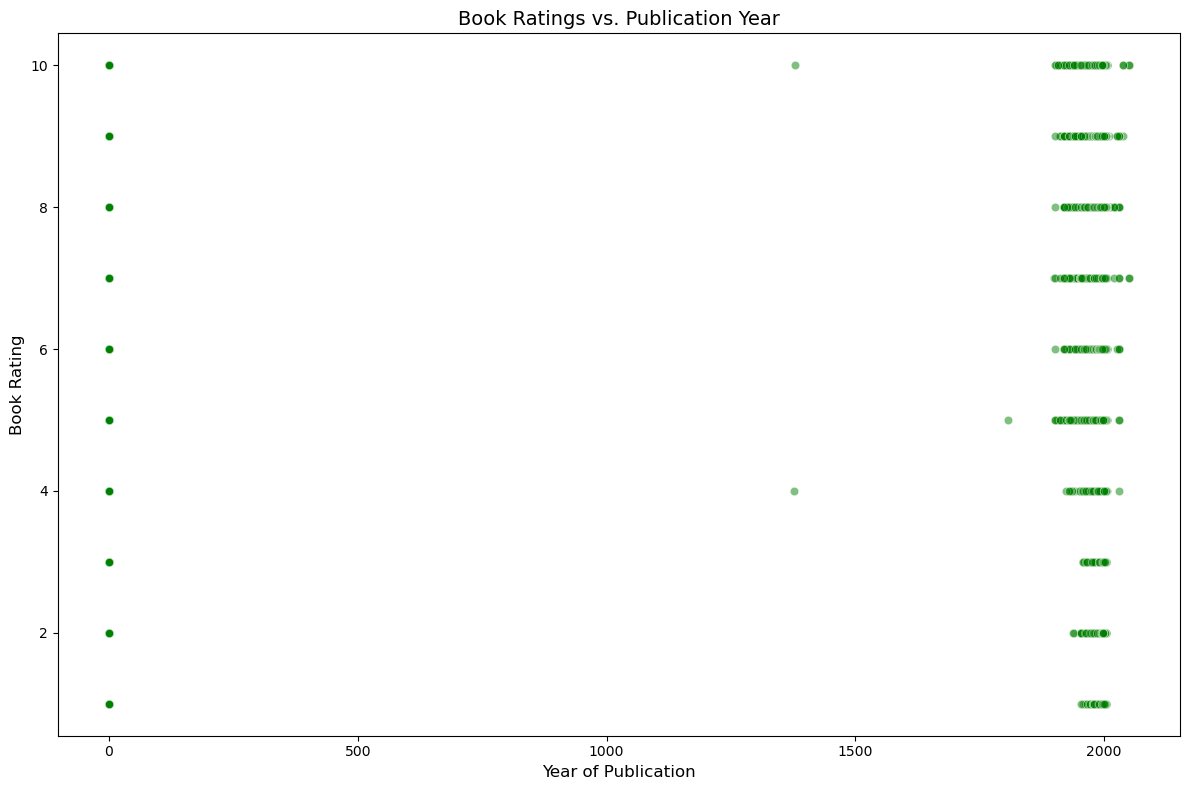

In [51]:
# Ensure 'Year-Of-Publication' is numeric in merged_df for filtering
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')

# Filter merged_df to include only publication years that are in books_df
valid_years = books_df['Year-Of-Publication'].unique()
merged_df = merged_df[merged_df['Year-Of-Publication'].isin(valid_years)]

# Remove books with a rating of 0
merged_df = merged_df[merged_df['Book-Rating'] != 0]

# Plot the relationship between book publication year and rating
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=merged_df, alpha=0.5, color='green')
plt.title('Book Ratings vs. Publication Year', fontsize=14)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Book Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [52]:
# 5. Top 10 Most Rated Books
###########################################
# Group by book title and count the number of ratings
top_rated_books = merged_df.groupby('Book-Title').size().reset_index(name='Rating-Count')
# Sort the books by the number of ratings
top_rated_books = top_rated_books.sort_values('Rating-Count', ascending=False).head(10)


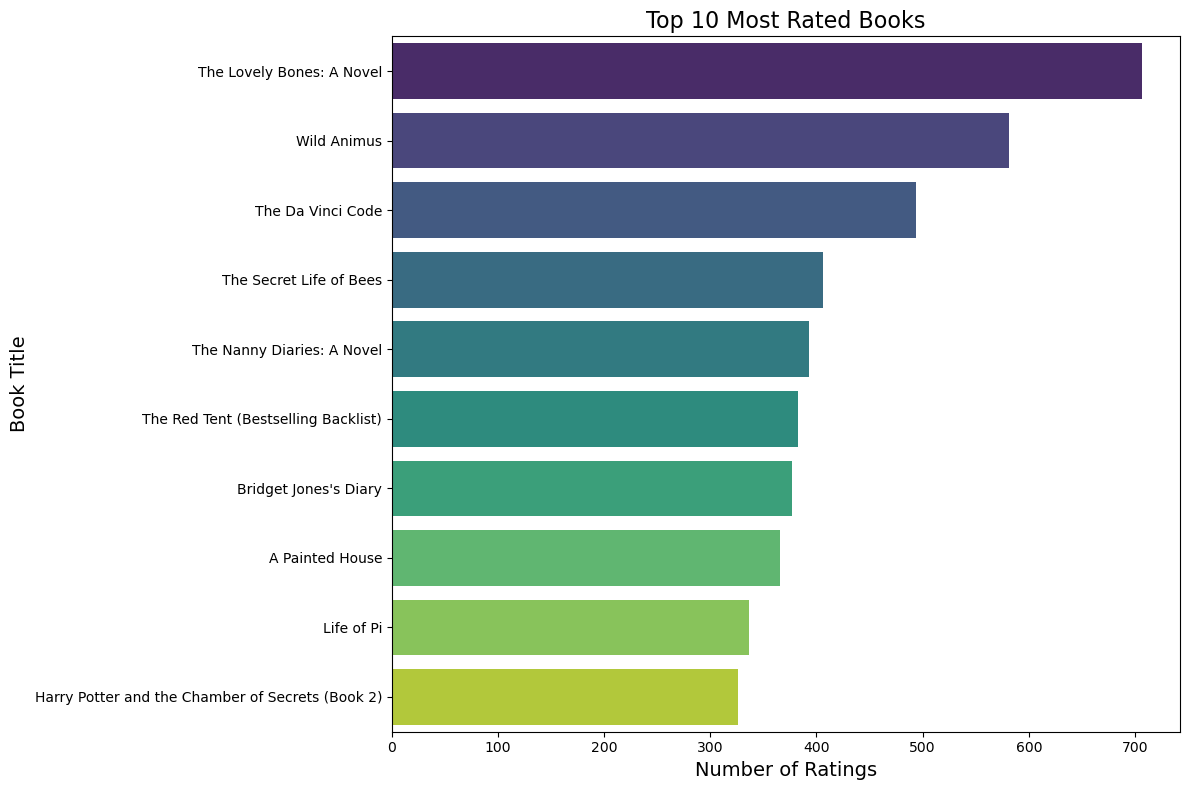

In [54]:
# Plot the top 10 most rated books
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating-Count', y='Book-Title', data=top_rated_books, palette='viridis', hue='Book-Title', dodge=False) # dodge=False to have a single color
plt.title('Top 10 Most Rated Books', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=14)
plt.ylabel('Book Title', fontsize=14)
plt.tight_layout()
plt.show()

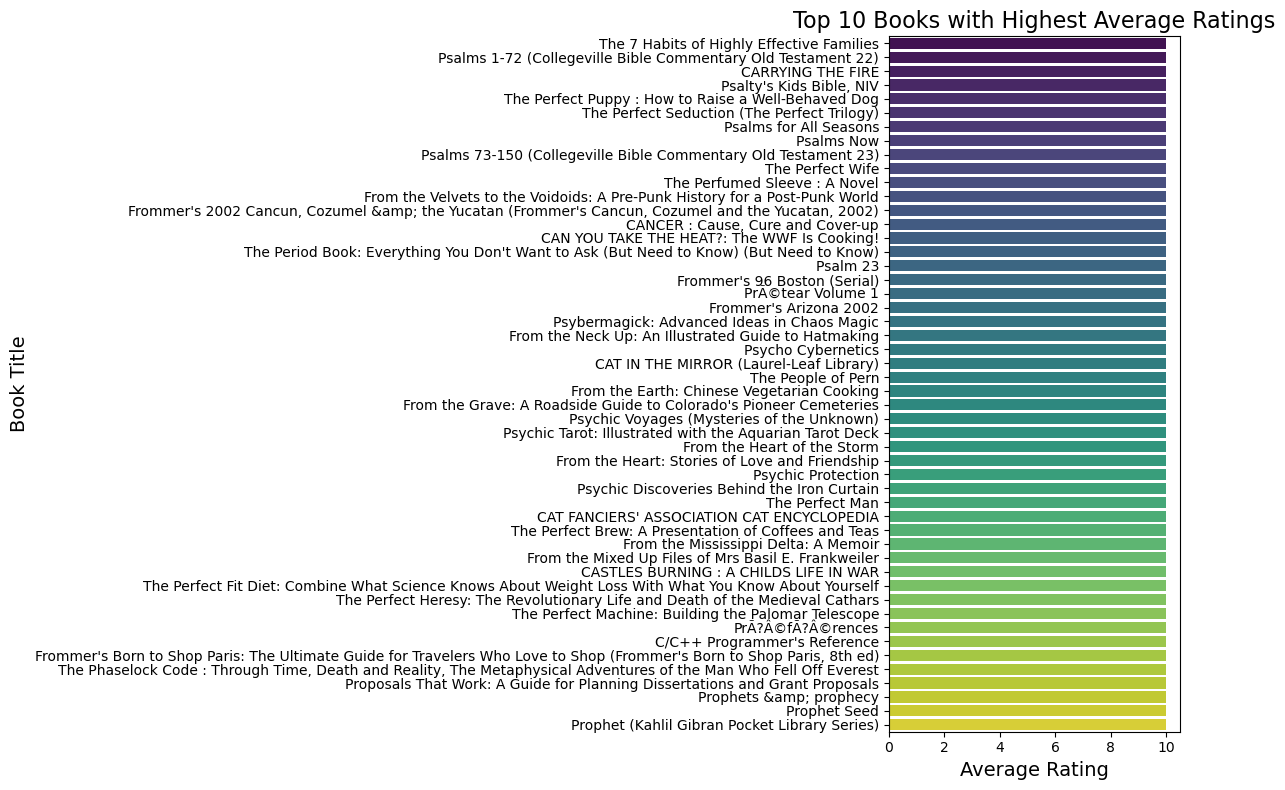

In [57]:
# 6. Top 10 Books with Highest Average Ratings
###########################################
# Group by book title and calculate the average rating
avg_rating_books = merged_df.groupby('Book-Title')['Book-Rating'].mean().reset_index(name='Avg-Rating')
# Sort the books by average rating
top_avg_rated_books = avg_rating_books.sort_values('Avg-Rating', ascending=False).head(50)

# Plot the top 10 books with the highest average ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg-Rating', y='Book-Title', data=top_avg_rated_books, palette='viridis', hue='Book-Title', dodge=False)
plt.title('Top 10 Books with Highest Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Book Title', fontsize=14)
plt.tight_layout()
plt.show()

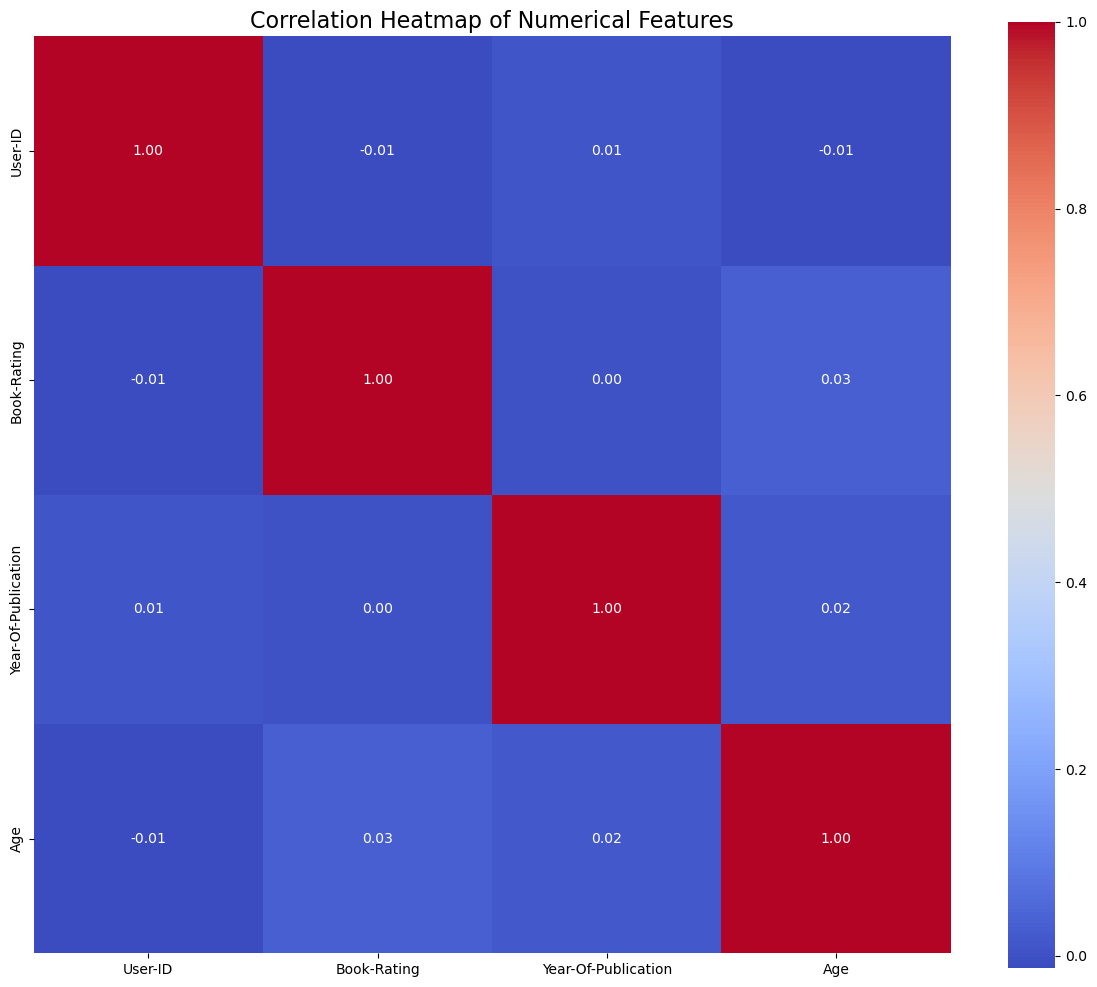

In [61]:
# 5. Correlation Heatmap of Numerical Features from Merged Data
###########################################
plt.figure(figsize=(12, 10))
# Select only numerical features for correlation
numerical_features = merged_df.select_dtypes(include=['number'])
corr_matrix = numerical_features.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [62]:
# Ensure that the 'Year-Of-Publication' columns are numeric.
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')


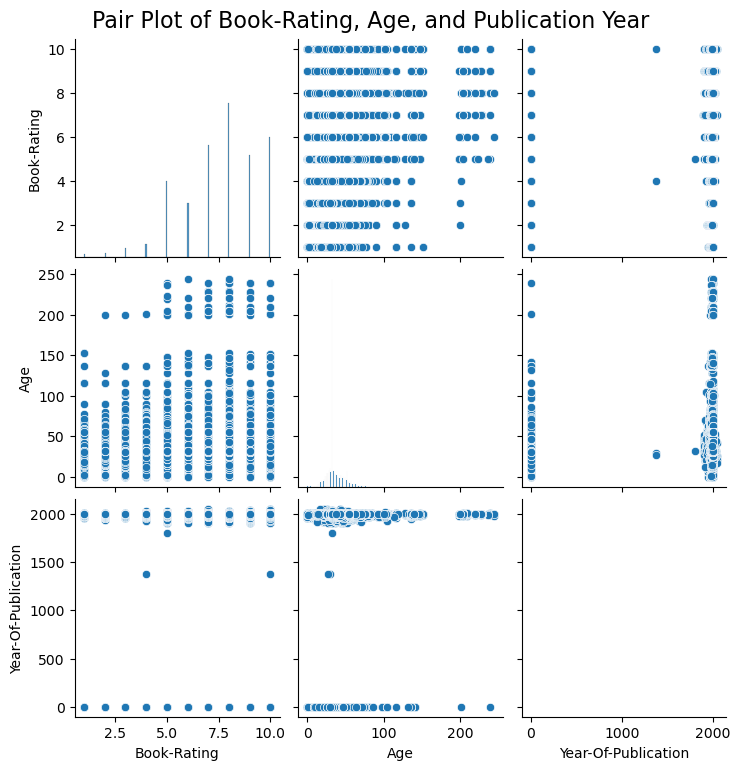

In [65]:
# 2. Pair Plot
# ---------------------------------------------------------------------
# This pair plot provides scatter plots and histograms for 'Book-Rating', 'Age', and
# 'Year-Of-Publication', helping us visualize relationships and distributions.
selected_columns = ["Book-Rating", "Age", "Year-Of-Publication"]
sns.pairplot(merged_df[selected_columns].dropna())
plt.suptitle("Pair Plot of Book-Rating, Age, and Publication Year", fontsize=16, y=1.02)
plt.show()
# Findings: The pair plot clearly outlines the distributions of each individual variable and
# any linear or non-linear trends among them. It can reveal, for instance, whether user age
# has little influence on book ratings or if there's any trend associated with the publication year.


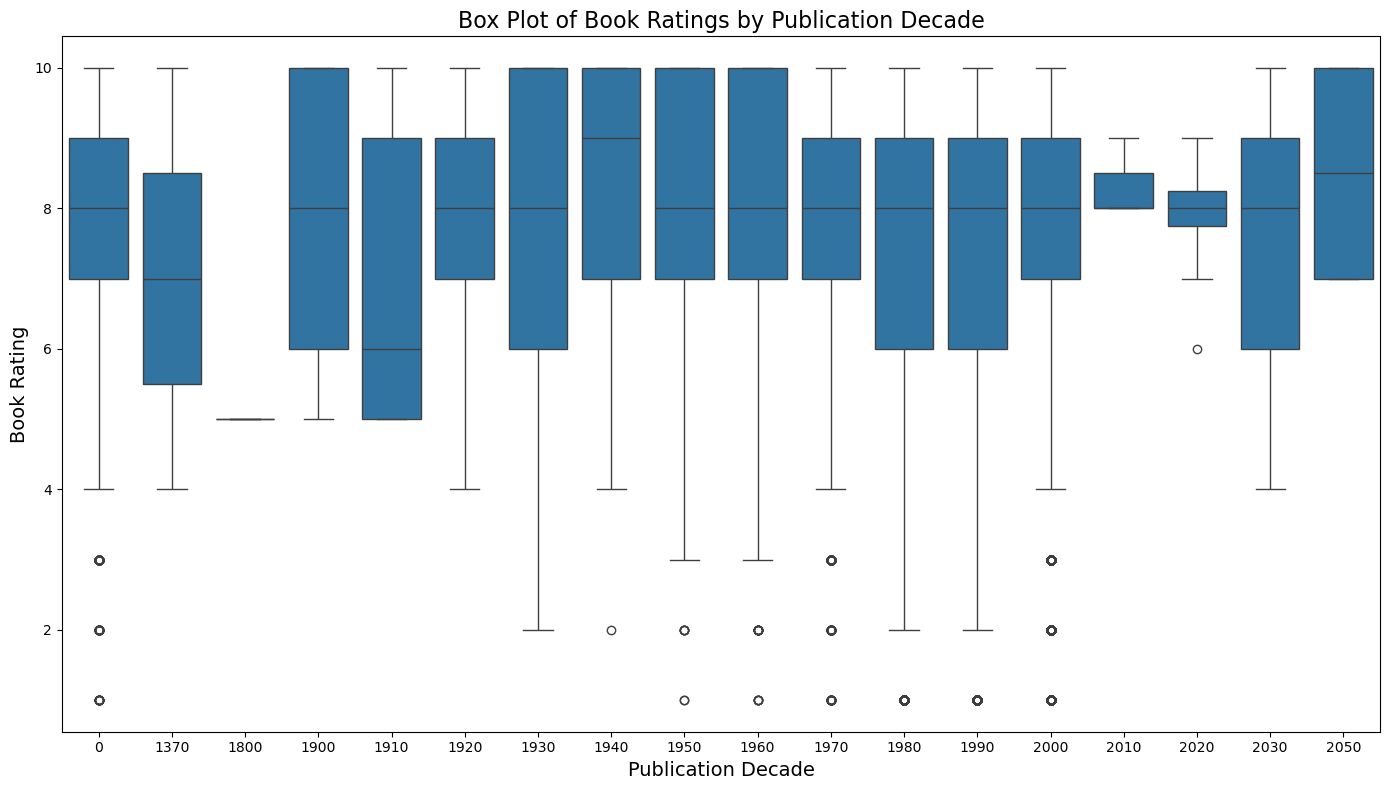

In [67]:
# 4. Box Plot of Book Ratings by Publication Decade
# ---------------------------------------------------------------------
# This visualization compares the book ratings across different publication decades.
# It shows the median, quartiles, and potential outliers for each decade.
merged_df["Decade"] = (merged_df["Year-Of-Publication"] // 10) * 10
plt.figure(figsize=(14, 8))
sns.boxplot(x="Decade", y="Book-Rating", data=merged_df.dropna(subset=["Decade"]))
plt.title("Box Plot of Book Ratings by Publication Decade", fontsize=16)
plt.xlabel("Publication Decade", fontsize=14)
plt.ylabel("Book Rating", fontsize=14)
plt.tight_layout()
plt.show()

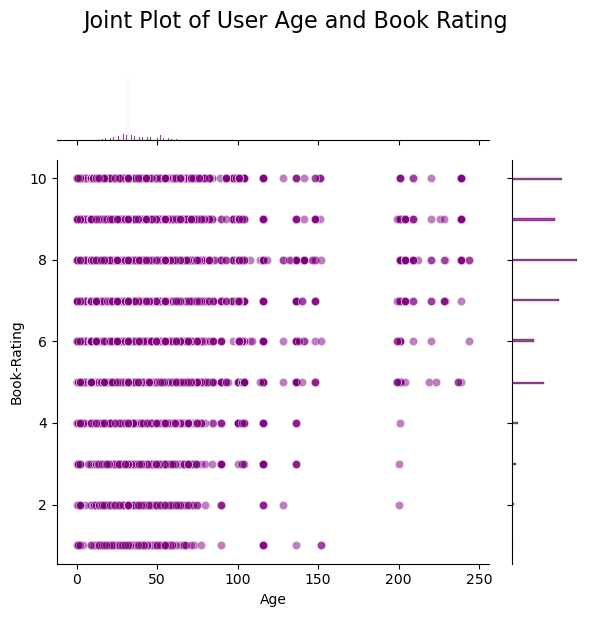

In [68]:
# 5. Joint Plot: User Age vs. Book Rating
# ---------------------------------------------------------------------
# This joint plot visualizes the relationship between user age and the ratings they provide.
# It also shows the distribution of both variables along the axes.
sns.jointplot(x="Age", y="Book-Rating", data=merged_df, kind="scatter", color="purple", alpha=0.5)
plt.suptitle("Joint Plot of User Age and Book Rating", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
# Findings: The joint plot can reveal whether there is a trend where, perhaps, users of a certain age
# systematically give higher or lower ratings. Clusters in the plot or the lack thereof can help
# inform further investigation into user behaviors.

## visualizing outliers and handling them

In [90]:
# Assume merged_df is already loaded into the environment.
df = merged_df.copy()

# Ensure the columns are numeric
df['Year-Of-Publication'] = pd.to_numeric(df['Year-Of-Publication'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Book-Rating'] = pd.to_numeric(df['Book-Rating'], errors='coerce')

# Create columns to indicate outliers based on defined rules.
df['Age_Outlier'] = (df['Age'] < 3) | (df['Age'] > 100)
df['Year_Outlier'] = (df['Year-Of-Publication'] < 1500) | (df['Year-Of-Publication'] > 2024)
df['Rating_Outlier'] = (df['Book-Rating'] < 0) | (df['Book-Rating'] > 10)


Number of Age outliers: 1360


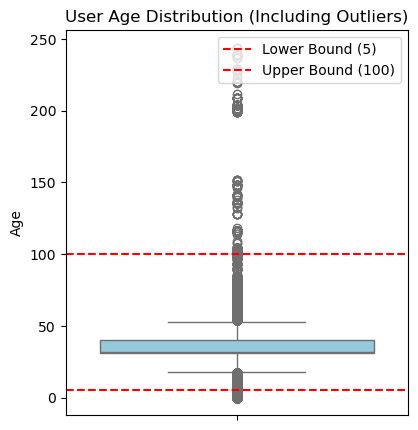

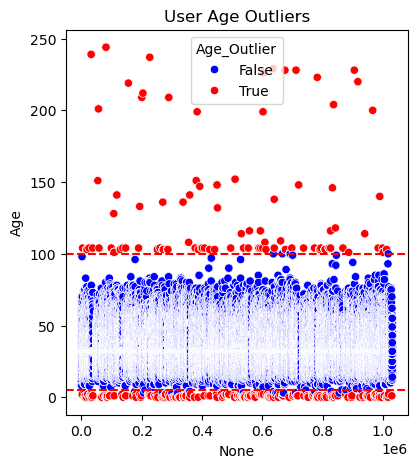

In [104]:
# 1. Box Plots to Visualize Outliers
# -----------------------------
plt.figure(figsize=(15, 5))

# Box plot for Age
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'], color="skyblue")
plt.title("User Age Distribution (Including Outliers)")
plt.axhline(5, color='red', linestyle='--', label='Lower Bound (5)')
plt.axhline(100, color='red', linestyle='--', label='Upper Bound (100)')
plt.legend()


#count of outliers
print("Number of Age outliers:", df['Age_Outlier'].sum())

#Scatter Plots Highlighting Outliers
# -----------------------------
plt.figure(figsize=(15, 5))

# Scatter plot for Age with outlier highlighting
plt.subplot(1, 3, 1)
sns.scatterplot(x=df.index, y="Age", data=df, hue="Age_Outlier",
                palette={False: "blue", True: "red"}, legend="full")
plt.title("User Age Outliers")
plt.axhline(5, color='red', linestyle='--')
plt.axhline(100, color='red', linestyle='--')

Number of Year outliers: 5809


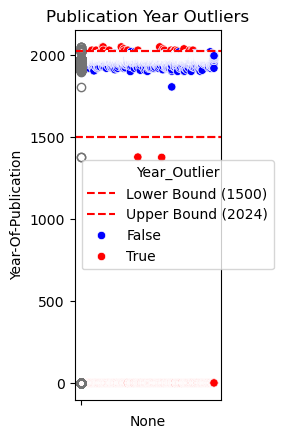

In [107]:
# Box plot for Publication Year
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Year-Of-Publication'], color="lightgreen")
plt.title("Publication Year Distribution (Including Outliers)")
plt.axhline(1500, color='red', linestyle='--', label='Lower Bound (1500)')
plt.axhline(2024, color='red', linestyle='--', label='Upper Bound (2024)')
plt.legend()

#count of outliers
print("Number of Year outliers:", df['Year_Outlier'].sum())

# Scatter plot for Publication Year with outlier highlighting
plt.subplot(1, 3, 2)
sns.scatterplot(x=df.index, y="Year-Of-Publication", data=df, hue="Year_Outlier",
                palette={False: "blue", True: "red"}, legend="full")
plt.title("Publication Year Outliers")
plt.axhline(1500, color='red', linestyle='--')
plt.axhline(2024, color='red', linestyle='--')


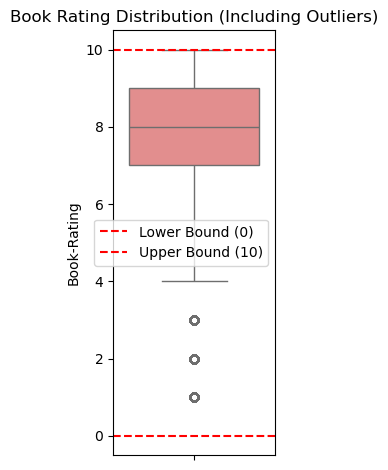

Number of Rating outliers: 0


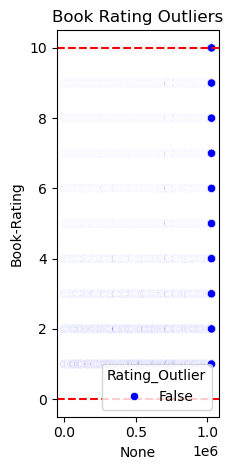

In [108]:
# Box plot for Book Rating
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Book-Rating'], color="lightcoral")
plt.title("Book Rating Distribution (Including Outliers)")
plt.axhline(0, color='red', linestyle='--', label='Lower Bound (0)')
plt.axhline(10, color='red', linestyle='--', label='Upper Bound (10)')
plt.legend()

plt.tight_layout()
plt.show()

#count of outliers
print("Number of Rating outliers:", df['Rating_Outlier'].sum())


# Scatter plot for Book Rating with outlier highlighting
plt.subplot(1, 3, 3)
sns.scatterplot(x=df.index, y="Book-Rating", data=df, hue="Rating_Outlier",
                palette={False: "blue", True: "red"}, legend="full")
plt.title("Book Rating Outliers")
plt.axhline(0, color='red', linestyle='--')
plt.axhline(10, color='red', linestyle='--')

plt.tight_layout()
plt.show()

In [109]:
# 1. Duplicate / Unusual Identifiers

# Check for duplicate ISBNs in books_df:
duplicate_isbn = books_df['ISBN'][books_df['ISBN'].duplicated()]
if not duplicate_isbn.empty:
    print("Duplicate ISBN entries found in books_df:")
    print(duplicate_isbn.value_counts())
else:
    print("No duplicate ISBNs found in books_df.")

# Check for duplicate ratings in ratings_df (same user rating same book more than once)
duplicate_ratings = ratings_df.duplicated(subset=['User-ID', 'ISBN'], keep=False)
if duplicate_ratings.any():
    print("\nDuplicate rating entries (same User-ID and ISBN) found in ratings_df:")
    print(ratings_df[duplicate_ratings])
else:
    print("\nNo duplicate rating entries found in ratings_df.")


No duplicate ISBNs found in books_df.

No duplicate rating entries found in ratings_df.


In [110]:
# 2. User Location Quality Check

# Find unusual locations: empty strings, common "n/a" strings, or extremely short strings (< 3 characters)
def is_unusual_location(location):
    if pd.isna(location):
        return True
    location_lower = location.strip().lower()
    return (location_lower == 'n/a'
            or location_lower == ''
            or len(location_lower) < 3)

users_df['location_issue'] = users_df['Location'].apply(is_unusual_location)
unusual_locations = users_df[users_df['location_issue']]
if not unusual_locations.empty:
    print("\nUnusual or problematic locations found in users_df:")
    print(unusual_locations[['User-ID', 'Location']])
else:
    print("\nNo unusual locations found in users_df.")



No unusual locations found in users_df.


In [111]:
# 3. Rating Patterns

# Identify users always giving extreme ratings (0 or 10)
user_rating_summary = ratings_df.groupby('User-ID')['Book-Rating'].agg(['min', 'max', 'count']).reset_index()
extreme_users = user_rating_summary[(user_rating_summary['min'] == 0) & (user_rating_summary['max'] == 0)]
extreme_users = pd.concat(
    [extreme_users, user_rating_summary[(user_rating_summary['min'] == 10) & (user_rating_summary['max'] == 10)]]
)
if not extreme_users.empty:
    print("\nUsers consistently rating only with extreme scores (either all 0's or all 10's):")
    print(extreme_users)
else:
    print("\nNo users found that are consistently rating only with extreme scores.")



Users consistently rating only with extreme scores (either all 0's or all 10's):
        User-ID  min  max  count
0             2    0    0      1
1             7    0    0      1
10           20    0    0      1
12           23    0    0      1
15           36    0    0      1
...         ...  ...  ...    ...
105235   278750   10   10      1
105245   278772   10   10      1
105262   278807   10   10      1
105272   278831   10   10      1
105273   278832   10   10      3

[33921 rows x 4 columns]


In [112]:
# Identify books with very few ratings (e.g., only one rating)
book_rating_counts = ratings_df.groupby('ISBN').size().reset_index(name="rating_count")
few_reviews = book_rating_counts[book_rating_counts["rating_count"] == 1]
if not few_reviews.empty:
    print("\nBooks with only one rating found in ratings_df:")
    print(few_reviews)
else:
    print("\nEvery book has more than one rating in ratings_df.")



Books with only one rating found in ratings_df:
               ISBN  rating_count
2        0586045007             1
4        9032803328             1
5        9044922564             1
6        9044922572             1
7        9044922718             1
...             ...           ...
340551     cn113107             1
340552   ooo7156103             1
340553   §423350229             1
340554  ´3499128624             1
340555    Ô½crosoft             1

[197045 rows x 2 columns]


In [113]:
# 4. Textual Outliers in books_df

# Check for unusually short or long Book Titles, Authors and Publisher names.
def text_length_outliers(series, min_len=2, max_len=100):
    return series[series.str.len() < min_len].tolist(), series[series.str.len() > max_len].tolist()

short_titles, long_titles = text_length_outliers(books_df['Book-Title'])
short_authors, long_authors = text_length_outliers(books_df['Book-Author'])
short_publishers, long_publishers = text_length_outliers(books_df['Publisher'])

if short_titles or long_titles:
    print("\nBook Titles with unusual lengths:")
    if short_titles:
        print("Very short titles:", short_titles)
    if long_titles:
        print("Very long titles:", long_titles)
else:
    print("\nBook Titles seem to be of typical length.")

if short_authors or long_authors:
    print("\nBook Authors with unusual lengths:")
    if short_authors:
        print("Very short author names:", short_authors)
    if long_authors:
        print("Very long author names:", long_authors)
else:
    print("\nBook Author names seem to be of typical length.")

if short_publishers or long_publishers:
    print("\nPublishers with unusual lengths:")
    if short_publishers:
        print("Very short publisher names:", short_publishers)
    if long_publishers:
        print("Very long publisher names:", long_publishers)
else:
    print("\nPublisher names seem to be of typical length.")



Book Titles with unusual lengths:
Very short titles: ['Q', 'K', 'e', 'V', 'Q', 'I', 'Z', 'H', 'M', 'H', 'S', 'Q', 'G']
Very long titles: ["If I'd Known Then What I Know Now: Why Not Learn from the Mistakes of Others? : You Can't Afford to Make Them All Yourself", 'Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!', 'Love, Miracles, and Animal Healing : A heartwarming look at the spiritual bond between animals and humans', 'Cybill Disobedience: How I Survived Beauty Pageants, Elvis, Sex, Bruce Willis, Lies, Marriage, Motherhood, Hollywood, and the Irrepressible Urge to Say What I Think', 'The Adrian Mole Diaries : The Secret Diary of Adrian Mole, Aged 13 3/4 : The Growing Pains of Adrian Mole', 'The Best Democracy Money Can Buy: The Truth About Corporate Cons, Globalization and High-Finance Fraudsters', "How the Irish Saved Civilization: The Untold Story of Ireland's Heroic Role from the Fall of Rome to the Rise of Medieval Europe (H

In [114]:
# 5. Temporal Outliers

# Already checked during cleaning: Book publication years should be between 1500 and 2024
invalid_years = books_df[(pd.to_numeric(books_df["Year-Of-Publication"], errors='coerce') < 1500)
                         | (pd.to_numeric(books_df["Year-Of-Publication"], errors='coerce') > 2024)]
if not invalid_years.empty:
    print("\nBooks with publication years outside the acceptable range (1500-2024):")
    print(invalid_years[['ISBN', 'Book-Title', 'Year-Of-Publication']])
else:
    print("\nAll books have publication years within the acceptable range (1500-2024).")


Books with publication years outside the acceptable range (1500-2024):
              ISBN                                         Book-Title  \
176     3150000335                                   Kabale Und Liebe   
188     342311360X                            Die Liebe in Den Zelten   
288     0571197639                        Poisonwood Bible Edition Uk   
351     3596214629       Herr Der Fliegen (Fiction, Poetry and Drama)   
542     8845229041  Biblioteca Universale Rizzoli: Sulla Sponda De...   
...            ...                                                ...   
270794  014029953X                         Foe (Essential.penguin S.)   
270913  0340571187                                     Postmens House   
271094  8427201079                           El Misterio De Sittaford   
271182  0887781721                                          Tom Penny   
271196  3150013763                                     Der Hofmeister   

        Year-Of-Publication  
176                  

#### handling outliers

In [115]:
# Create a copy of merged_df for outlier handling.
df_merged_clean = merged_df.copy()

# Convert columns to numeric values (if not already)
df_merged_clean['Year-Of-Publication'] = pd.to_numeric(df_merged_clean['Year-Of-Publication'], errors='coerce')
df_merged_clean['Age'] = pd.to_numeric(df_merged_clean['Age'], errors='coerce')
df_merged_clean['Book-Rating'] = pd.to_numeric(df_merged_clean['Book-Rating'], errors='coerce')

# Print the original number of records.
print(f"Original record count: {len(df_merged_clean)}")


Original record count: 383842


In [116]:
# Apply outlier removal rules:
# - Remove rows with Age < 5 or Age > 100.
# - Remove rows with Year-Of-Publication < 1500 or Year-Of-Publication > 2024.
# - Remove rows with Book-Rating < 0 or Book-Rating > 10.
df_merged_clean = df_merged_clean[
    (df_merged_clean['Age'] >= 5) & (df_merged_clean['Age'] <= 100) &
    (df_merged_clean['Year-Of-Publication'] >= 1500) & (df_merged_clean['Year-Of-Publication'] <= 2024) &
    (df_merged_clean['Book-Rating'] >= 0) & (df_merged_clean['Book-Rating'] <= 10)
    ]

In [118]:
# Print the cleaned number of records to compare.
print(f"Cleaned record count (after outlier removal): {len(df_merged_clean)}")

# Optionally: Save the cleaned DataFrame to a CSV to be used by downstream processes.
# df_merged_clean.to_csv('df_merged_clean.csv', index=False)

# Display the first few rows of the cleaned DataFrame.
df_merged_clean.head(10)

Cleaned record count (after outlier removal): 376478


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,Decade
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0,2000
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0,1990
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0,2000
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",32.0,2000
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0,2000
16,276747,0671537458,9,Waiting to Exhale,Terry McMillan,1995,Pocket,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,http://images.amazon.com/images/P/0671537458.0...,"iowa city, iowa, usa",25.0,1990
17,276747,0679776818,8,Birdsong: A Novel of Love and War,Sebastian Faulks,1997,Vintage Books USA,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,http://images.amazon.com/images/P/0679776818.0...,"iowa city, iowa, usa",25.0,1990
18,276747,0943066433,7,How to Deal With Difficult People,Rick Brinkman,1995,Careertrack Inc.,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...,http://images.amazon.com/images/P/0943066433.0...,"iowa city, iowa, usa",25.0,1990
20,276747,1885408226,7,The Golden Rule of Schmoozing,Aye Jaye,1998,Listen &amp; Live Audio,http://images.amazon.com/images/P/1885408226.0...,http://images.amazon.com/images/P/1885408226.0...,http://images.amazon.com/images/P/1885408226.0...,"iowa city, iowa, usa",25.0,1990
21,276748,0747558167,6,Apricots on the Nile: A Memoir with Recipes,Colette Rossant,2002,Bloomsbury Publishing Plc,http://images.amazon.com/images/P/0747558167.0...,http://images.amazon.com/images/P/0747558167.0...,http://images.amazon.com/images/P/0747558167.0...,"jubail ind.-city, eastern province, saudi arabia",39.0,2000


## visualizing non outlier dataset

Text(0, 0.5, 'Frequency')

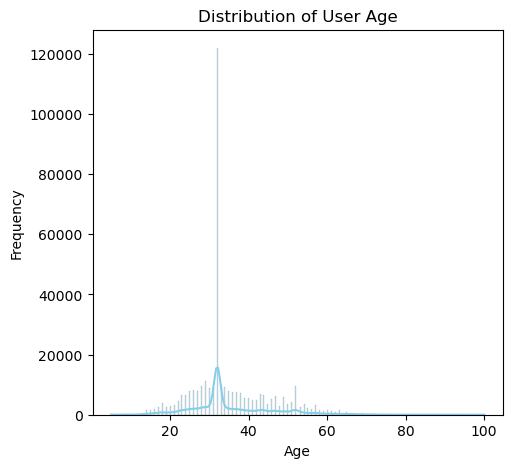

In [121]:
# 1. Histograms with KDE plots

plt.figure(figsize=(18, 5))

# Histogram for Age
plt.subplot(1, 3, 1)
sns.histplot(df_merged_clean['Age'], kde=True, color="skyblue")
plt.title("Distribution of User Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

#### the KDE plot shows the smoothed distribution of user ages, which appears to be more evenly distributed after removing outliers. It shows that users are mostly between 20 and 40 years old, with a peak around 30 years old.

Text(0, 0.5, 'Frequency')

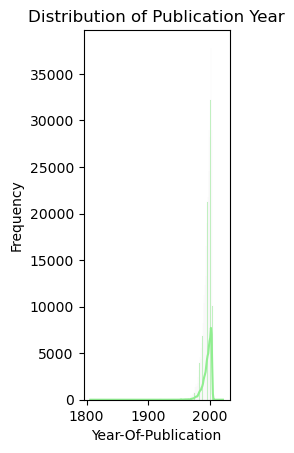

In [122]:
# Histogram for Year-Of-Publication
plt.subplot(1, 3, 2)
sns.histplot(df_merged_clean['Year-Of-Publication'], kde=True, color="lightgreen")
plt.title("Distribution of Publication Year")
plt.xlabel("Year-Of-Publication")
plt.ylabel("Frequency")

#### this plot shows the distribution of book publication years, with a peak around the 1990s. The KDE plot indicates a slight decline in the number of books published in recent years.

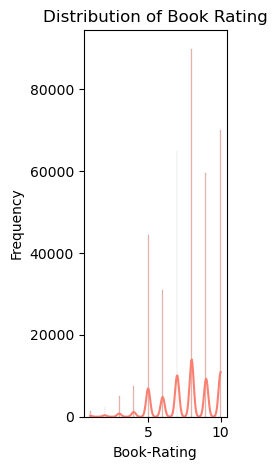

In [123]:
# Histogram for Book-Rating
plt.subplot(1, 3, 3)
sns.histplot(df_merged_clean['Book-Rating'], kde=True, color="salmon")
plt.title("Distribution of Book Rating")
plt.xlabel("Book-Rating")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

#### the distribution of book ratings shows that most ratings are concentrated around 7 and 8, with fewer ratings at the extremes (0 and 10). The KDE plot indicates a peak around 8, suggesting that users tend to rate books positively.

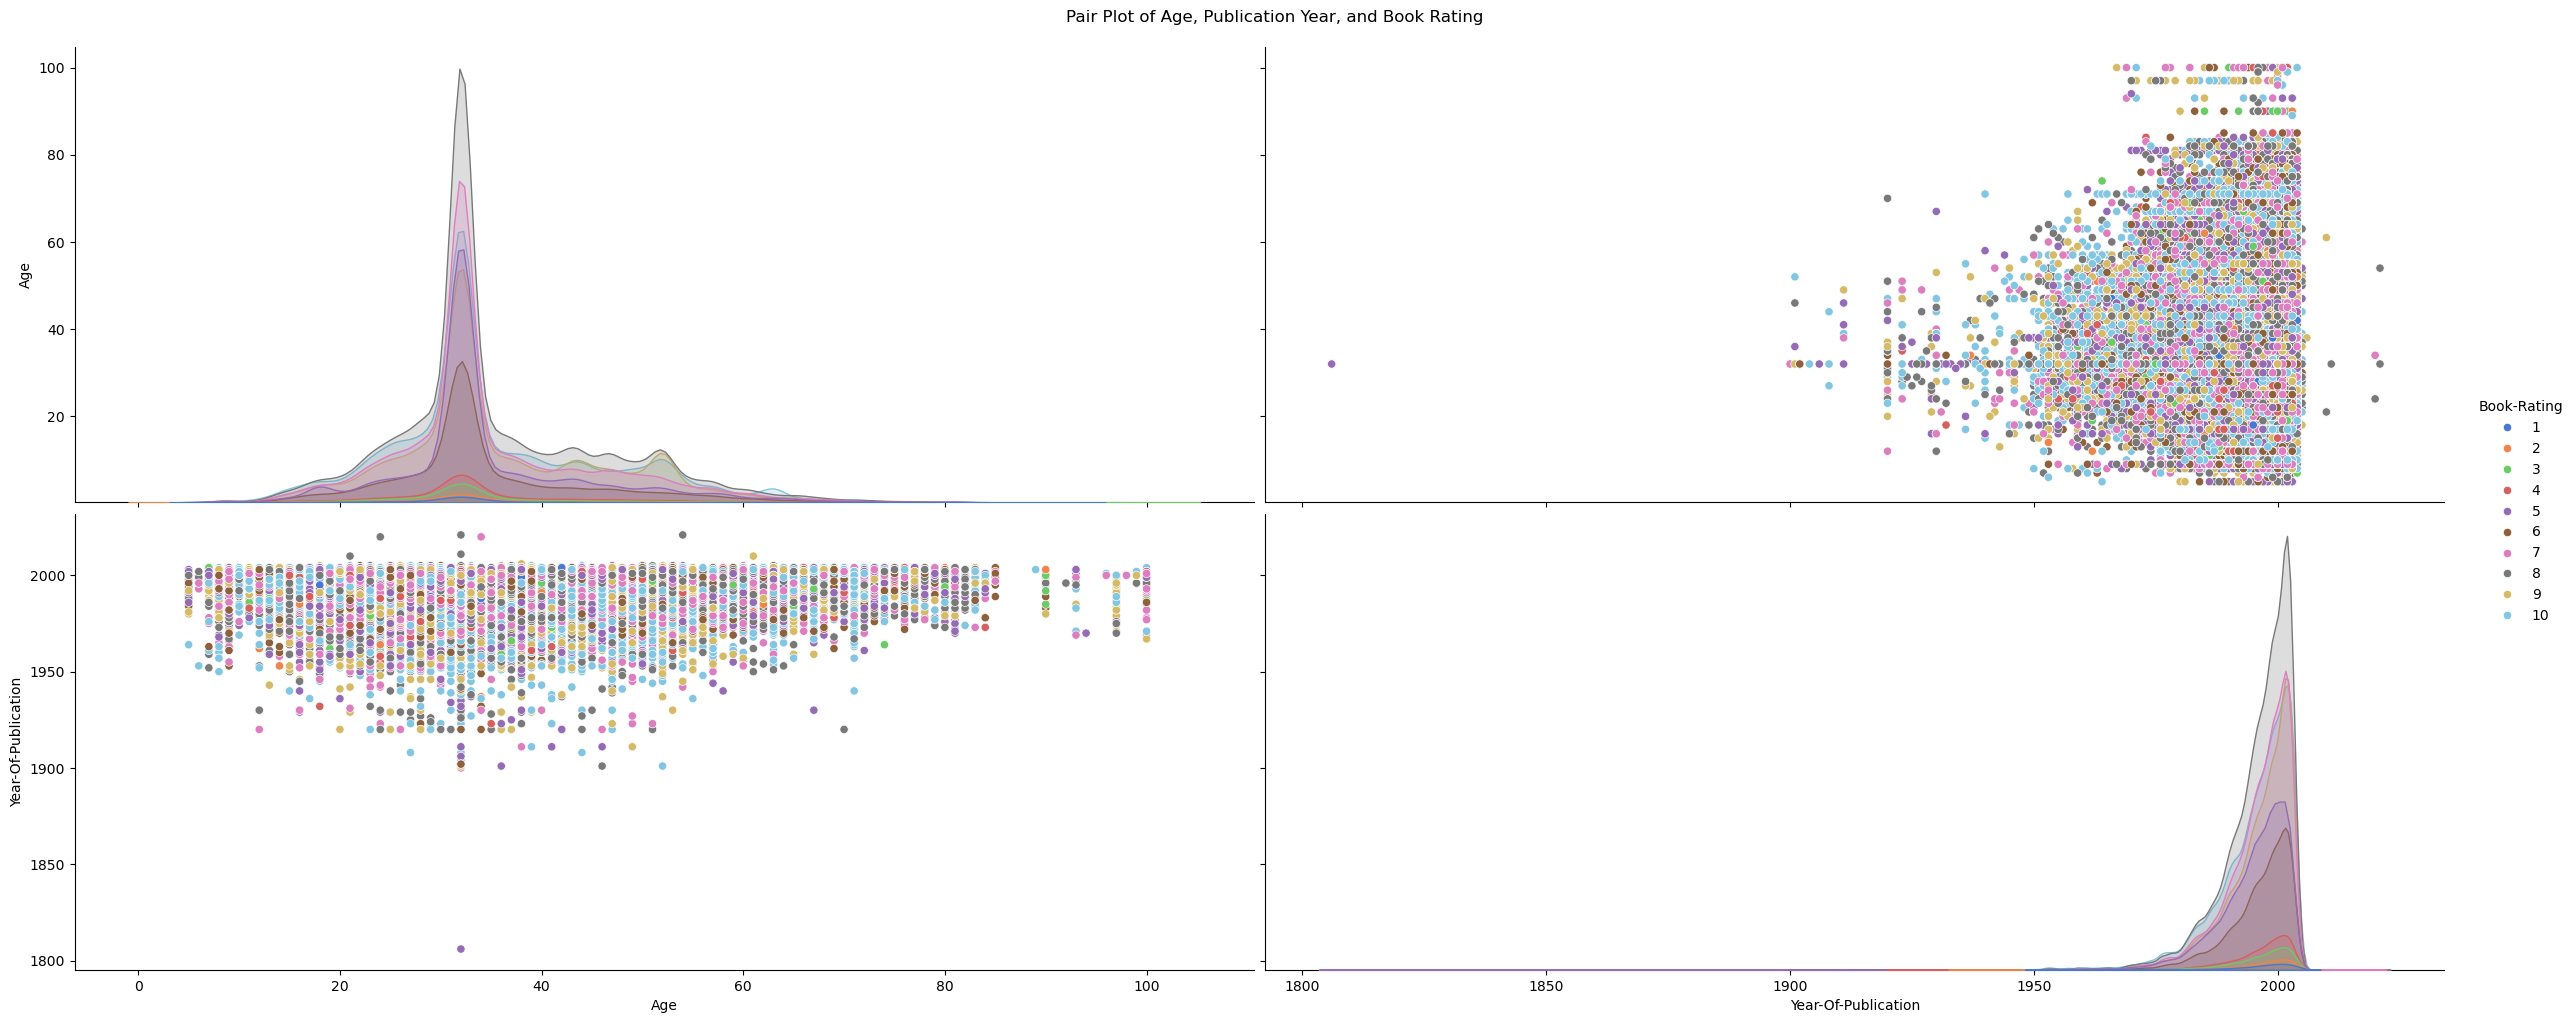

In [141]:
# Pair Plot to visualize relationships between all three variables with hue for Book-Rating
sns.pairplot(df_merged_clean[['Age', 'Year-Of-Publication', 'Book-Rating']],
             diag_kind="kde", palette="muted", hue='Book-Rating', height=5, aspect=2.5)
plt.suptitle("Pair Plot of Age, Publication Year, and Book Rating", y=1.02)
plt.show()

In [139]:
"""
This script enhances the df_merged_clean DataFrame by adding an 'Age_Group'
column. The 'Location' column remains unchanged. The 'Age_Group' is created
based on the following categorization:
  - Children: Ages 3 to 12
  - Youth: Ages 13 to 25
  - Adults: Ages 26 to 59
  - Senior Citizens: Ages 60 and above

Make sure that df_merged_clean is loaded into your environment before running
this script (for example, by reading it from a CSV file).
"""

import pandas as pd

# Assume df_merged_clean is already loaded into the environment.
# For example:
# df_merged_clean = pd.read_csv('df_merged_clean.csv')

def get_age_group(age: float) -> str:
    """
    Categorizes age into groups based on the defined ranges:
      - Children: Ages 3 to 12
      - Youth: Ages 13 to 25
      - Adults: Ages 26 to 59
      - Senior Citizens: Ages 60 and above
    Ages that are missing or below 3 are categorized as 'Unknown'.
    """
    if pd.isna(age) or age < 3:
        return "Unknown"
    if 3 <= age <= 12:
        return "Children"
    elif 13 <= age <= 25:
        return "Youth"
    elif 26 <= age < 60:
        return "Adults"
    elif age >= 60:
        return "Senior Citizens"
    else:
        return "Unknown"

# Create the 'Age_Group' column by applying the get_age_group function to the 'Age' column
df_merged_clean['Age_Group'] = df_merged_clean['Age'].apply(get_age_group)

print("Successfully added 'Age_Group' column to df_merged_clean.")
df_merged_clean.head()


Successfully added 'Age_Group' column to df_merged_clean.


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age,Decade,City,Country,Area,State,Age_Group
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0,2000,seattle,usa,,washington,Adults
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0,1990,rijeka,croatia,,n/a,Youth
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0,2000,rijeka,croatia,,n/a,Youth
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"torrance, california, usa",32.0,2000,torrance,usa,,california,Adults
13,276747,0060517794,9,Little Altars Everywhere,Rebecca Wells,2003,HarperTorch,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,http://images.amazon.com/images/P/0060517794.0...,"iowa city, iowa, usa",25.0,2000,iowa city,usa,,iowa,Youth


In [ ]:
# drop area city state country
